In [91]:
import pandas as pd
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import spacy
import string
from gensim.models.phrases import Phrases, Phraser
import pyLDAvis
import pyLDAvis.gensim
from gensim.utils import lemmatize
from pprint import pprint
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
cnn = pd.read_csv("../data/cnn.csv")

In [3]:
cnn_abstract = cnn[['Abstract','Title']].dropna().reset_index(drop = True)

In [4]:
cnn_abstract.head()

,Abstract,Title
0,Incomplete surgical resection of head and neck...,The Use of Optical Coherence Tomography and Co...
1,We implement 2 different multitask learning (M...,Automatic extraction of cancer registry report...
2,Convolutional neural network (CNN) is employed...,Convolutional neural networks for the design a...
3,The purpose of the present study was to evalua...,Deep Learning-Based Deep Brain Stimulation Tar...
4,We apply convolutional neural network (CNN) mo...,Estimating PM2.5 concentration of the contermi...


In [ ]:
#Convert to lowercase
#Remove punctuations
#remove special characters and digits

# cnn_abstract['clean_text'] = cnn_abstract['Abstract'].apply(lambda x: " ".join(x.lower() for x in x.split()))\
#                             .str.replace('[^a-zA-Z]+', ' ')\
#                             .str.replace('(\\d|\\W)+', ' ')
                            

In [ ]:

# def lemmatization(text):
#     clean_text=[]
    
#     for item in text:
#         doc = nlp(" ".join(item))
#         text=" ".join([token.lemma_ for token in doc])
#         clean_text.append(text)
#     return clean_text
        

In [5]:
stop_words = stopwords.words('english')
nlp = spacy.load('en', disable=['parser', 'ner'])
# clean the text using below for loop
clean_text = []
for index in range(len(cnn_abstract)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', cnn_abstract['Abstract'][index])

    #Convert to lowercase
    text = text.lower()
    
    #remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    #Convert to list of words from text
    text = text.split()
    
    # remove stop words after splitting text and joint the words
    text =[word for word in text if word not in stop_words]
    text = " ".join(text)
    # lemmatize words using spacy
    
    doc = nlp(text)
    text=" ".join([token.lemma_ for token in doc])

   # append to clean_text
    clean_text.append(text)
    
cnn_abstract['clean_text'] = clean_text

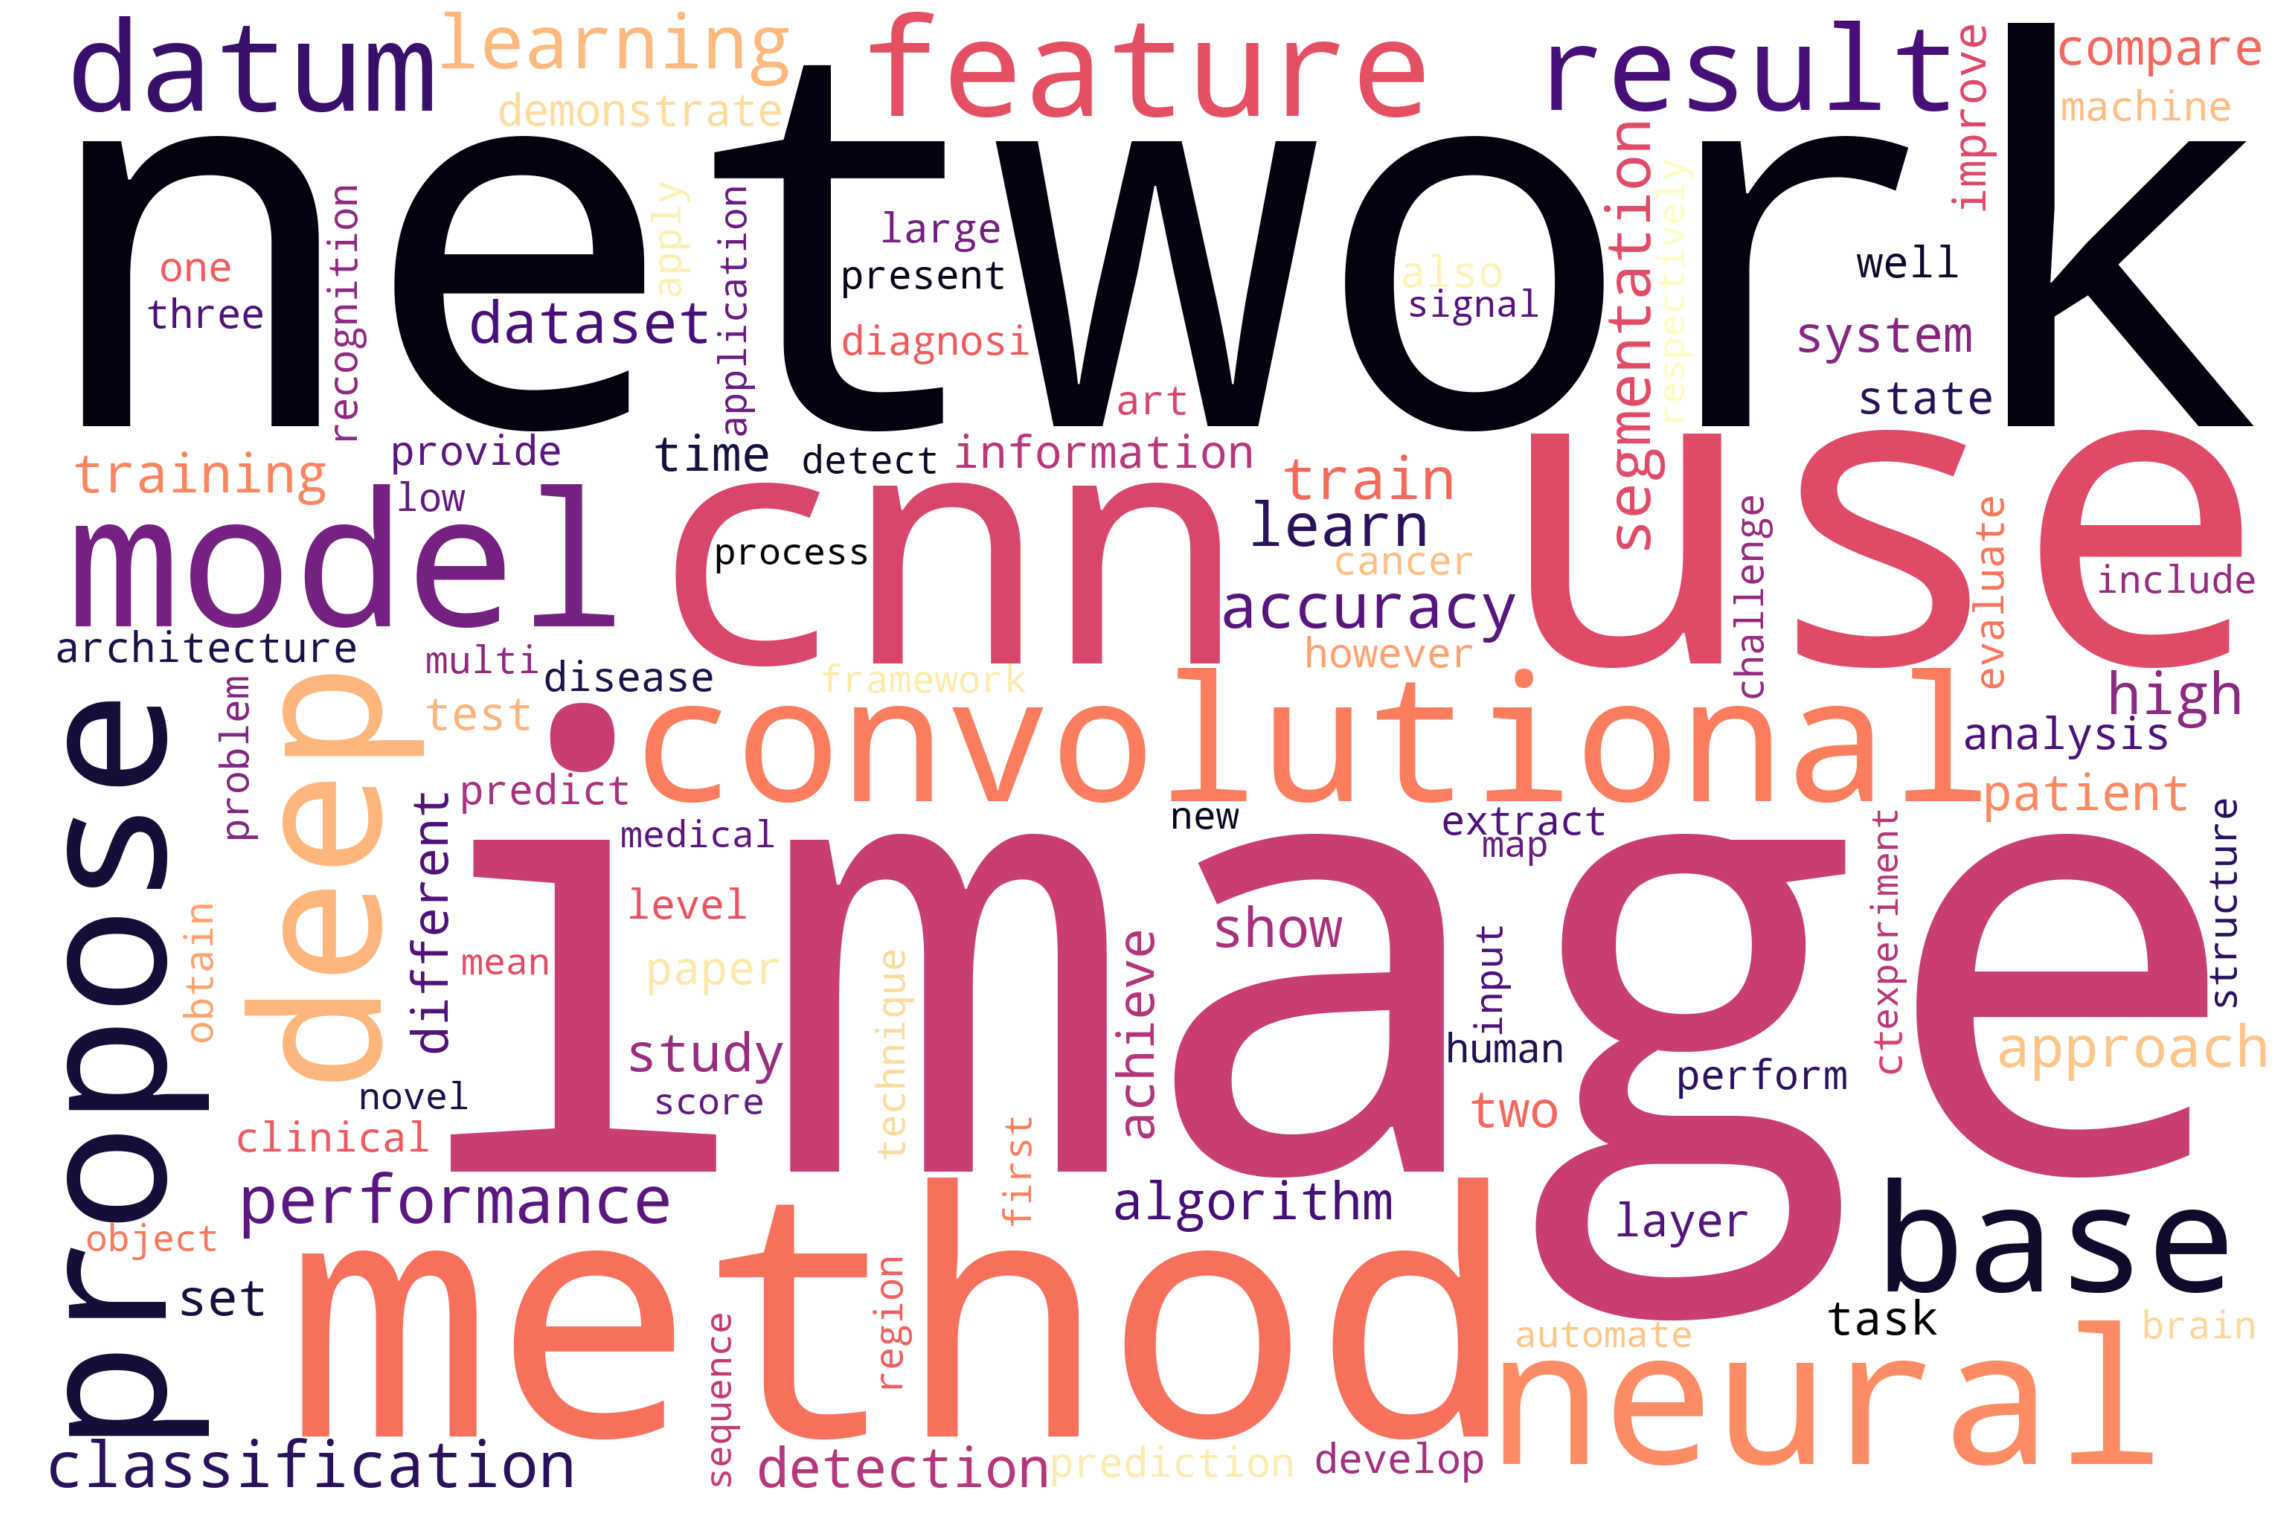

In [6]:
#Word cloud of 100 words in the entire clean text
wordcloud = WordCloud(width = 3000,
    height = 2000,background_color='white',colormap=plt.cm.magma,
                          stopwords=stop_words,
                          max_words=100,
                           
                          random_state=42,collocations=False
                         ).generate(str(clean_text))

#print(wordcloud)
plt.figure(figsize = (40, 30), edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("../data/word_cloud.png")
plt.show()

In [180]:
stop_words = stopwords.words('english')
print(len(stop_words))
remove_words = ['overall', 'perform','attempts', 'model','use', 'calculating','performance','trainable',
                'data','result','representations','using','limited','used','feature','proposed','evaluate'
                ,'performance','algorithm','lr','ext','respective','respectively', 'accuracy', 'relatively'
                ,'small','challenge','validation','layer','better','three','detection','show','cnn','li', 
                'small','show','development','training','transfer','twos','cnns','pre','auroc','two','method',
                'parameters','segmentation','convolutional', 'neural', 'network', 'show','task','compare',
                'state','study', 'retrospective', 'datum','prediction','art','require', 'focus', 'base',
                'approach', 'paper', 'present', 'fall', 'due', 'recent', 'exponential', 'increase','analysis',
                'analysis','specificity','basis', 'function', 'kernel', 'area', 'curve', 'auc', 'may', 
                'useful','explore', 'two', 'different','test','models','system','deep', 'learning',
                'approach','require','may', 'useful','information', 'basis','obtain','methods','achieve',
                'level','al', 'research', 'grid', 'also','features', 'techniques', 'hard', 'parameter', 
                'sharing', 'cross', 'stitch', 'train', 'word', 'level', 'however','search', 'currently',
                'trained','article','analytic','datasets','fold', 'cross', 'propose','compared','based',
                'classification','results','dataset','multiple', 'time','architecture','end', 'sensitivity', 
                'specificity','proive','representation','input','technique','large','work','improve','layers',
                'set','learn','experiment','achieved','information','machine','offers', 'high','networks',
                'superior', 'classification', 'accuracy', 'for', 'automated', 'coding', 'support', 'aid', 'address',
               'available','https','important','role', 'application','good','rate','field','new','tool',
               'subject','value','map','quality','application','provide','one','mr', 'false','positive','tune','fine',
                'github','com','precision','recall','long','short','gold', 'standard','problem','demonstrate','apply',
                'well','truth','ground','similarity','coefficient']

#identifies and removes duplicates and returns a lits of words
remove_words= list(set(remove_words))
stop_words.extend(remove_words)
print(len(remove_words))
print(len(stop_words))

179
181
360


In [181]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
minus_stopwords = remove_stopwords(clean_text)

In [182]:
clean_text = [" ".join(x) for x in minus_stopwords]

In [183]:
def text_to_words(text):
    for sentence in text:
        yield(gensim.utils.simple_preprocess(str(sentence)))  # deacc=True removes punctuations

words_text = list(text_to_words(clean_text))

print(words_text[3])

['purpose', 'image', 'guide', 'surgical', 'planning', 'brain', 'stimulation', 'dbs', 'develop', 'semantic', 'dbs', 'target', 'prospectively', 'clinically', 'fast', 'gradient', 'echo', 'image', 'patient', 'manually', 'draw', 'prepare', 'subthalamic', 'red', 'nucleus', 'axial', 'cut', 'mm', 'anterior', 'posterior', 'commissure', 'line', 'fully', 'fcn', 'vgg', 'ensure', 'margin', 'identification', 'semantic', 'image', 'contrast', 'augmentation', 'nine', 'original', 'image', 'augment', 'image', 'semantic', 'measure', 'term', 'mean', 'mean', 'intersection', 'union', 'target', 'calculate', 'relative', 'distance', 'segment', 'anatomical', 'structure', 'consider', 'bejjani', 'target', 'mean', 'mean', 'intersection', 'union', 'image', 'augment', 'image', 'augment', 'image', 'dice', 'convert', 'intersection', 'union', 'image', 'semantic', 'adaptive', 'anatomical', 'variation', 'size', 'shape', 'asymmetry', 'clinical', 'patient', 'assess', 'essential', 'tremor', 'another', 'bradykinesia', 'gait',

In [184]:
#clean_text = [" ".join(x) for x in minus_stopwords]

                         Bigram       Freq
0                 medical image  44.990790
1               computer vision  39.955900
2                      ct image  39.100771
3            magnetic resonance  34.683582
4       artificial intelligence  30.193231
5                    real world  27.147712
6              receiver operate  26.540659
7                   term memory  26.244841
8                 breast cancer  25.936644
9        operate characteristic  25.322627
10                random forest  25.183519
11                fully connect  25.015274
12              resonance image  24.979914
13                   hand craft  24.256245
14           compute tomography  23.011505
15                      ct scan  22.422560
16                  multi scale  20.731320
17              region interest  20.152088
18                   vector svm  20.046516
19               fully automate  19.834857
20                  image image  19.751947
21           computer diagnosis  19.646436
22         

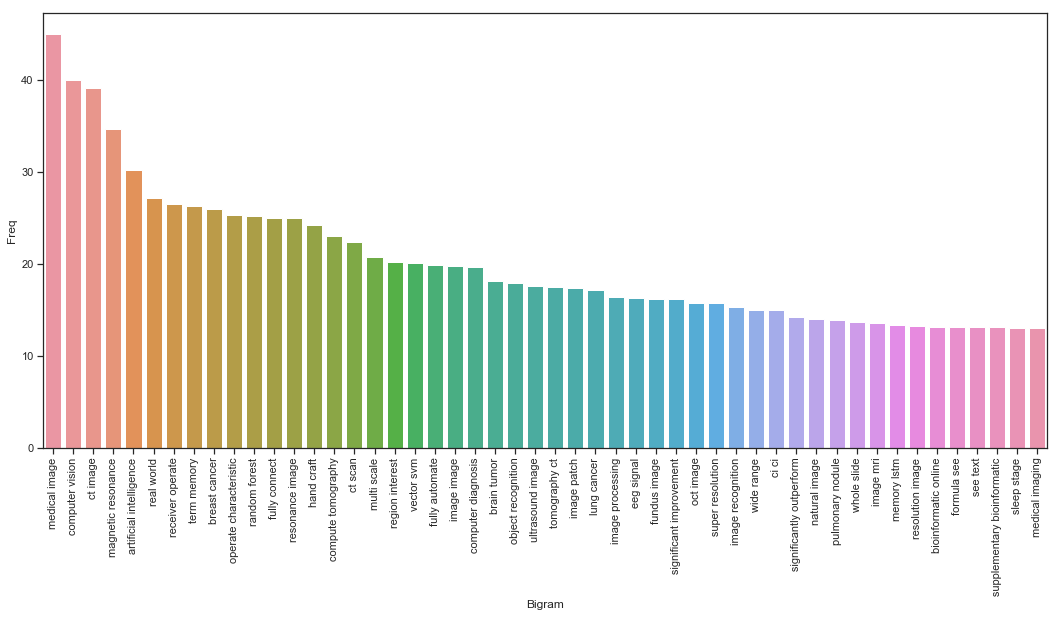

In [185]:
#Most frequently occuring bigrams in the data. plot both bar plot and word cloud of bigrams in the data 
def top_bi_grams(clean_text, n=None):
    clean_text = [" ".join(x) for x in minus_stopwords]
    vectorizer = TfidfVectorizer(ngram_range = (2,2), min_df = 5,stop_words=stop_words).fit(clean_text)
    bows = vectorizer.transform(clean_text)
    sumwords = bows.sum(axis=0) 
    words_freq = [(word, sumwords[0, idx]) for word, idx in     
                  vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top_bigrams = top_bi_grams(clean_text, n=50)
top_bigrams_df = pd.DataFrame(top_bigrams)
top_bigrams_df.columns=["Bigram", "Freq"]
print(top_bigrams_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(18,8)}, style ='white' )
sns.set_style("ticks")

h=sns.barplot(x="Bigram", y="Freq", data=top_bigrams_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90);

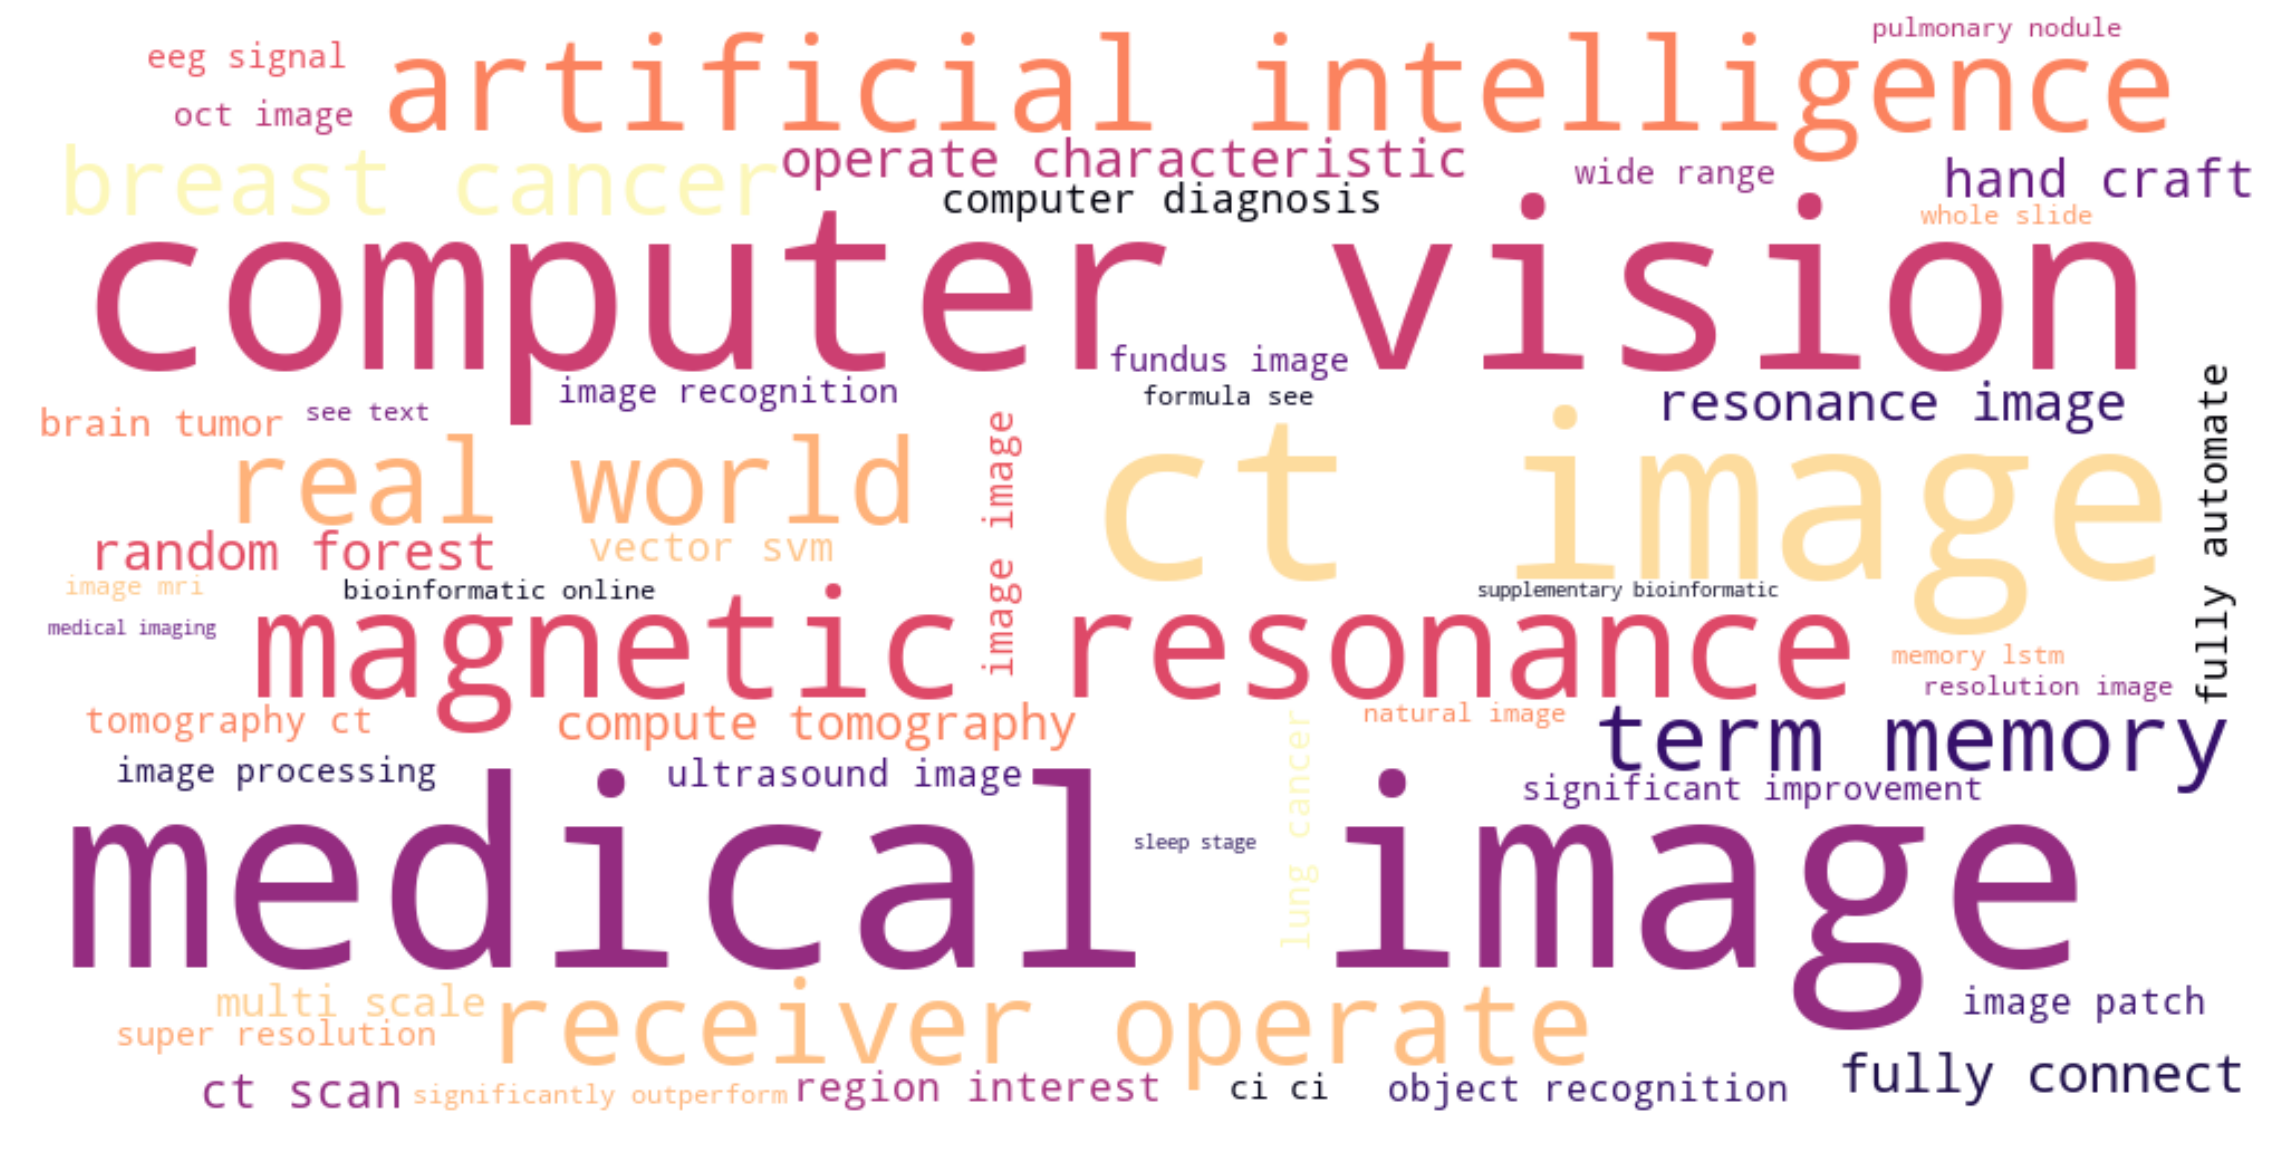

In [186]:
bigrams = {}
for w, x in top_bigrams_df.values:
    bigrams[w] = x
wordcloud = WordCloud(width = 1000,
    height = 500,background_color='white',colormap=plt.cm.magma,margin=5,
                     min_word_length =2, relative_scaling=1, collocations=False)
wordcloud.generate_from_frequencies(bigrams)
plt.figure(figsize = (40, 30),
    
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [187]:
bigram = Phrases(minus_stopwords, min_count=1, threshold=100)
trigram = Phrases(minus_stopwords, min_count=1, threshold=100)
bigrams_mod = Phraser(bigram)
trigrams_mod = Phraser(trigram)

In [188]:
def bigrams(texts):
    return [bigrams_mod[doc] for doc in texts]
words_bigrams = bigrams(minus_stopwords)

def trigrams(texts):
    return [trigrams_mod[doc] for doc in texts]
words_trigrams = trigrams(minus_stopwords)

In [189]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [190]:
data_lemme = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [191]:
# Create Dictionary
id2word = corpora.Dictionary(words_bigrams)


# Create Corpus
texts = words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:2])


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 3), (20, 2), (21, 5), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 2), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1)], [(7, 2), (13, 2), (63, 5), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 4), (70, 1), (71, 1), (72, 5), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 3), (80, 2), (81, 1), (82, 5), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2), (105, 3), (106, 4), (107, 1), (108, 1),

In [192]:
id2word[76]

'corpus'

In [193]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=14, 
                     random_state=100,
                     update_every=1,
                     chunksize=1000,
                     passes=25,
                     alpha='auto',
                     per_word_topics=True)

In [194]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.068*"lung" + 0.065*"nodule" + 0.043*"convnet" + 0.038*"ct" + '
  '0.021*"pulmonary_nodule" + 0.015*"cardiac" + 0.013*"lv" + 0.012*"cac" + '
  '0.011*"scan" + 0.010*"cbct"'),
 (1,
  '0.045*"image" + 0.009*"object" + 0.008*"framework" + 0.007*"recognition" + '
  '0.007*"novel" + 0.007*"multi" + 0.006*"scale" + 0.006*"experimental" + '
  '0.006*"extract" + 0.006*"low"'),
 (2,
  '0.060*"image" + 0.017*"ct" + 0.013*"brain" + 0.012*"tumor" + '
  '0.012*"patient" + 0.011*"mri" + 0.010*"lesion" + 0.010*"tissue" + '
  '0.010*"automatic" + 0.010*"scan"'),
 (3,
  '0.044*"noise" + 0.037*"reconstruction" + 0.033*"event" + '
  '0.019*"reconstruct" + 0.017*"denoise" + 0.015*"signal" + 0.014*"spike" + '
  '0.011*"hardware" + 0.011*"neuron" + 0.010*"reduce"'),
 (4,
  '0.037*"mammogram" + 0.036*"fault" + 0.028*"mammography" + '
  '0.019*"thyroid_nodule" + 0.014*"thyroid" + 0.010*"ultrasound" + '
  '0.010*"belief_dbn" + 0.010*"fc" + 0.007*"country" + 0.007*"diabetes"'),
 (5,
  '0.060*"eeg" + 0.

In [195]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.087369169565347

Coherence Score:  0.46257180956833344


In [196]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

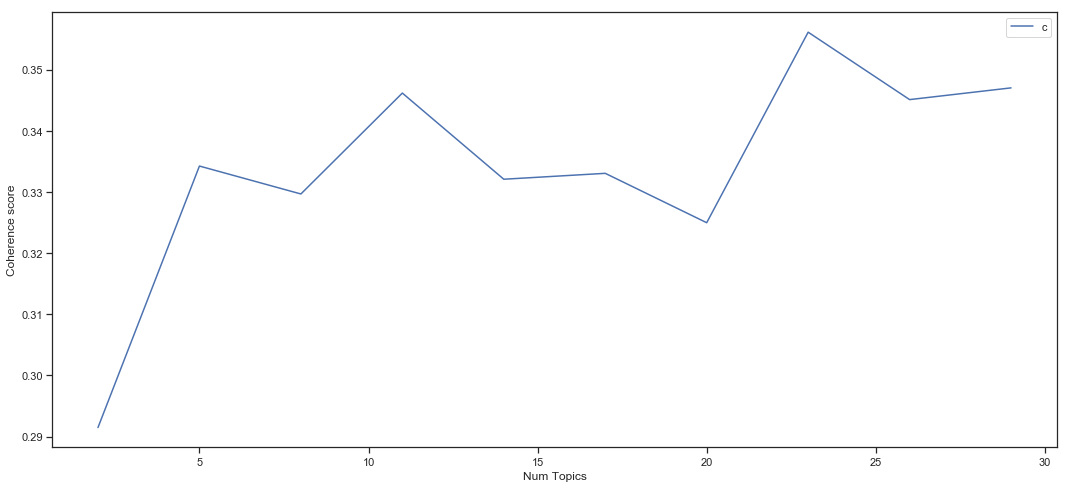

In [197]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigrams, start=2, limit=30, step=3)
# Show graph

limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [198]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

KeyboardInterrupt: 

In [ ]:
pyLDAvis.save_html(vis, '../data/lda.html')

In [ ]:
cnn_abstract[cnn_abstract.clean_text.str.contains('text|analysis|natural language processing|nlp')]

In [ ]:
cnn_abstract.iloc[53][2]